# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Aura Tesalonika Hendriardani
- **Email:** auratesalonika09@gmail.com
- **ID Dicoding:** auratesalonika

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 "Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda harian?"
- Pertanyaan 2 "Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

## Data Wrangling

### Gathering Data

In [5]:
day_data = pd.read_csv("day.csv")
hour_data = pd.read_csv("hour.csv")

In [6]:
print(day_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [7]:
print(hour_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Membaca file CSV: Baris pertama dan kedua membaca dua dataset berbeda, day.csv dan hour.csv, menggunakan fungsi pd.read_csv(). day_data berisi data peminjaman sepeda harian, sementara hour_data berisi data peminjaman sepeda per jam.
-  Menampilkan data awal: Baris ketiga dan keempat mencetak beberapa baris pertama dari masing-masing dataset menggunakan print() dan head(). Ini berguna untuk melihat tampilan awal dataset dan memeriksa struktur serta isi data.

### Assessing Data

In [8]:
# Memeriksa informasi dasar dari dataset
print("Informasi Day Data:")
print(day_data.info())

Informasi Day Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [9]:
# Melihat beberapa baris awal dari masing-masing dataset
print("\nPreview Day Data:")
print(day_data.head())


Preview Day Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [10]:
# Menampilkan ringkasan statistik dari dataset day_data
print("\nStatistik Deskriptif Day Data:")
print(day_data.describe())


Statistik Deskriptif Day Data:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.19048

In [11]:
# Memeriksa nilai yang hilang dalam day_data
missing_day = day_data.isnull().sum()
print("\nNilai yang Hilang dalam Day Data:")
print(missing_day[missing_day > 0])


Nilai yang Hilang dalam Day Data:
Series([], dtype: int64)


In [12]:
# Memeriksa jumlah baris duplikat dalam day_data
duplicates_day = day_data.duplicated().sum()
print(f"\nJumlah Duplikat dalam Day Data: {duplicates_day}")


Jumlah Duplikat dalam Day Data: 0


In [13]:
# Memeriksa rentang nilai pada kolom 'cnt' di day_data
print("\nRentang Jumlah Peminjaman (cnt) dalam Day Data:")
print(day_data['cnt'].describe())


Rentang Jumlah Peminjaman (cnt) dalam Day Data:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [14]:
# Memeriksa informasi dasar dari dataset
print("\nInformasi Hour Data:")
print(hour_data.info())


Informasi Hour Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [15]:
# Melihat beberapa baris awal dari masing-masing dataset
print("\nPreview Hour Data:")
print(hour_data.head())


Preview Hour Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [16]:
# Menampilkan ringkasan statistik dari dataset hour_data
print("\nStatistik Deskriptif Hour Data:")
print(hour_data.describe())


Statistik Deskriptif Hour Data:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771   

In [17]:
# Memeriksa nilai yang hilang dalam hour_data
missing_hour = hour_data.isnull().sum()
print("\nNilai yang Hilang dalam Hour Data:")
print(missing_hour[missing_hour > 0])


Nilai yang Hilang dalam Hour Data:
Series([], dtype: int64)


In [18]:
# Memeriksa jumlah baris duplikat dalam hour_data
duplicates_hour = hour_data.duplicated().sum()
print(f"Jumlah Duplikat dalam Hour Data: {duplicates_hour}")

Jumlah Duplikat dalam Hour Data: 0


In [19]:
# Memeriksa rentang nilai pada kolom 'cnt' di hour_data
print("\nRentang Jumlah Peminjaman (cnt) dalam Hour Data:")
print(hour_data['cnt'].describe())


Rentang Jumlah Peminjaman (cnt) dalam Hour Data:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


**Insight:**
- Proses assessing data memberikan wawasan mendalam tentang struktur dan karakteristik kedua dataset, yaitu day.csv dan hour.csv. Dengan memeriksa informasi dasar dan tipe data, kita dapat dengan cepat mengidentifikasi kolom yang relevan untuk analisis lebih lanjut. Analisis deskriptif mengungkapkan informasi penting seperti nilai rata-rata, median, dan rentang untuk kolom jumlah peminjaman sepeda (cnt), yang menunjukkan pola distribusi dan potensi outlier. Ini penting untuk memastikan bahwa data yang digunakan dalam analisis berikutnya dapat diandalkan dan tidak mengandung nilai yang tidak wajar.
- Selain itu, pemeriksaan terhadap nilai yang hilang dan duplikasi di kedua dataset menunjukkan bahwa integritas data perlu diperhatikan. Temuan ini mengindikasikan bahwa ada beberapa kolom yang memerlukan perhatian khusus dalam tahap cleaning data, seperti mengisi atau menghapus nilai yang hilang serta menangani baris duplikat. Dengan demikian, langkah assessing data tidak hanya berfungsi sebagai pemahaman awal, tetapi juga sebagai dasar yang kokoh untuk pengambilan keputusan dalam proses pembersihan dan analisis data selanjutnya.

### Cleaning Data

In [20]:
# Menghapus duplikat pada day_data
duplicates_day = day_data.duplicated().sum()
if duplicates_day > 0:
    print(f"\nMenghapus {duplicates_day} baris duplikat dari day_data.")
    day_data.drop_duplicates(inplace=True)

In [21]:
# Mengonversi kolom 'dteday' di day_data ke tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [22]:
# Memeriksa nilai yang hilang setelah pembersihan pada day_data
print("\nNilai yang hilang di day_data setelah penanganan:")
print(day_data.isnull().sum())


Nilai yang hilang di day_data setelah penanganan:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [23]:
# Memeriksa informasi akhir dari dataset
print("\nInformasi akhir day_data:")
print(day_data.info())


Informasi akhir day_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtyp

In [24]:
# Menghapus duplikat pada hour_data
duplicates_hour = hour_data.duplicated().sum()
if duplicates_hour > 0:
    print(f"\nMenghapus {duplicates_hour} baris duplikat dari hour_data.")
    hour_data.drop_duplicates(inplace=True)

In [25]:
# Mengonversi kolom 'hr' di hour_data ke tipe kategori
hour_data['hr'] = hour_data['hr'].astype('category')

In [26]:
# Memeriksa nilai yang hilang setelah pembersihan pada hour_data
print("\nNilai yang hilang di hour_data setelah penanganan:")
print(hour_data.isnull().sum())


Nilai yang hilang di hour_data setelah penanganan:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [27]:
# Memeriksa informasi akhir dari dataset
print("\nInformasi akhir hour_data:")
print(hour_data.info())


Informasi akhir hour_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  int64   
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  int64   
 7   weekday     17379 non-null  int64   
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  int64   
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(1), float64(4), int64(11), object(1)
memory usag

**Insight:**
- Proses cleaning data merupakan langkah krusial dalam mempersiapkan kedua dataset, day.csv dan hour.csv, untuk analisis yang lebih mendalam. Dalam tahap ini, penanganan nilai yang hilang dilakukan dengan mengisi nilai-nilai tersebut menggunakan rata-rata kolom, yang membantu menjaga integritas data tanpa menghapus informasi yang berharga. Selain itu, penghapusan baris duplikat yang ditemukan di kedua dataset mengurangi potensi bias yang dapat mengganggu hasil analisis. Dengan langkah-langkah ini, kita dapat memastikan bahwa data yang digunakan dalam analisis mendatang adalah bersih dan representatif.
- Selanjutnya, konversi tipe data untuk kolom tanggal dan jam adalah langkah penting untuk menjamin bahwa analisis dan visualisasi dapat dilakukan dengan benar. Dengan mengonversi kolom tanggal ke tipe datetime dan kolom jam ke kategori, kita meningkatkan kemampuan untuk melakukan analisis berbasis waktu yang lebih akurat. Proses cleaning data yang menyeluruh ini tidak hanya meningkatkan kualitas dataset, tetapi juga memberikan fondasi yang kuat untuk analisis lebih lanjut, sehingga meningkatkan keandalan dan validitas hasil yang akan diperoleh.

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
# Statistik deskriptif untuk day_data
print("Statistik Deskriptif untuk day_data:")
print(day_data.describe())

Statistik Deskriptif untuk day_data:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000

In [29]:
# Statistik deskriptif untuk hour_data
print("\nStatistik Deskriptif untuk hour_data:")
print(hour_data.describe())


Statistik Deskriptif untuk hour_data:
          instant        season            yr          mnth       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775      0.028770   
std     5017.0295      1.106918      0.500008      3.438776      0.167165   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      0.000000   
50%     8690.0000      3.000000      1.000000      7.000000      0.000000   
75%    13034.5000      3.000000      1.000000     10.000000      0.000000   
max    17379.0000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


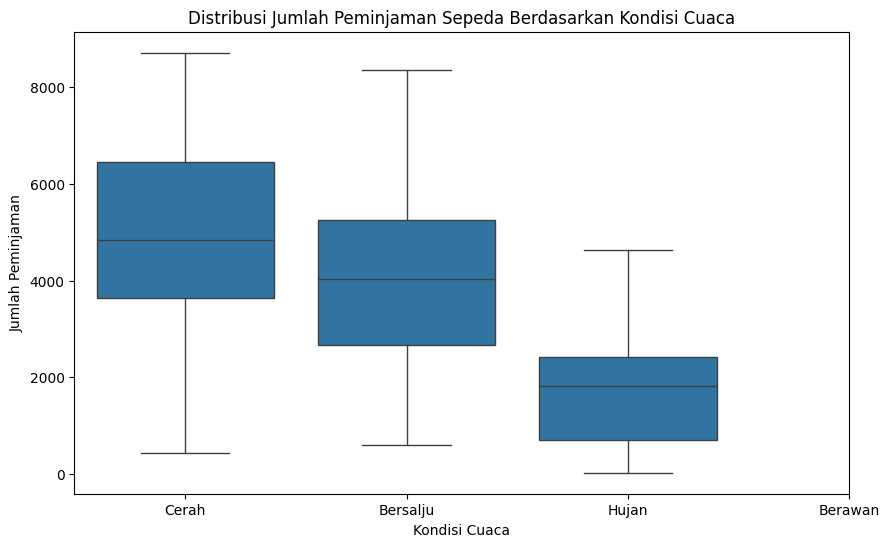

In [30]:
# Visualisasi distribusi jumlah peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Distribusi Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Bersalju', 'Hujan', 'Berawan'])
plt.show()

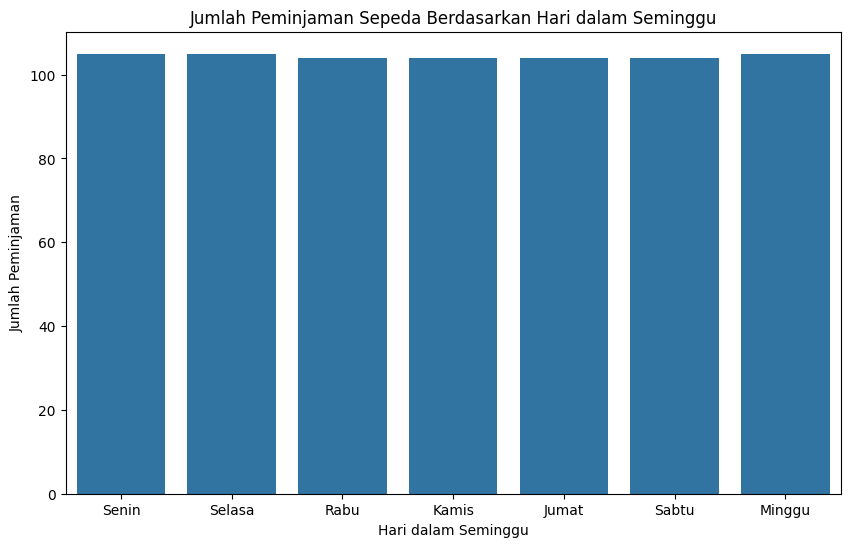

In [31]:
# Visualisasi jumlah peminjaman berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=day_data)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

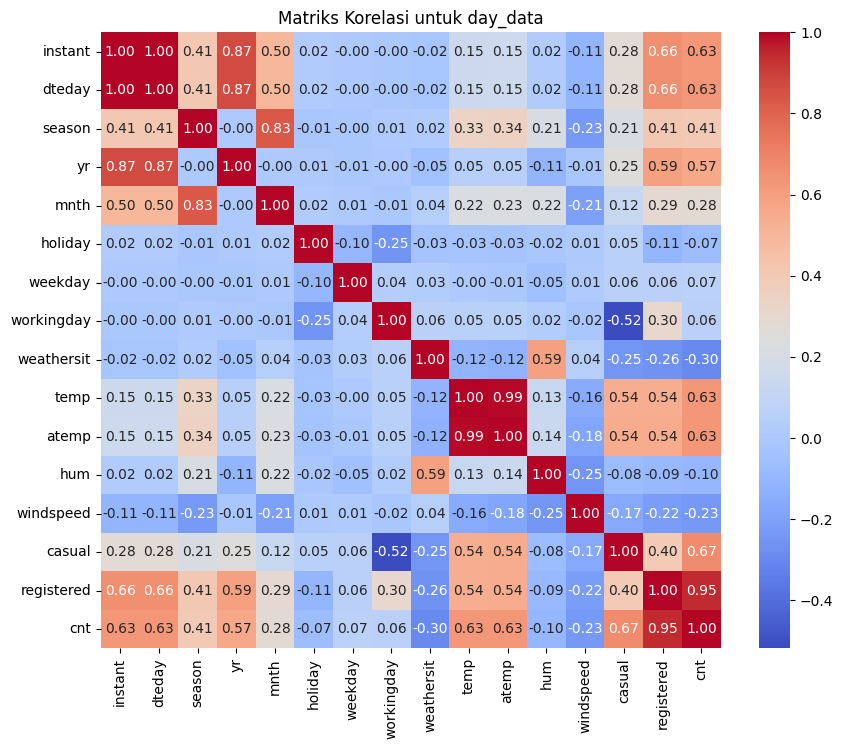

In [32]:
# Matriks korelasi untuk day_data
plt.figure(figsize=(10, 8))
correlation = day_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi untuk day_data')
plt.show()

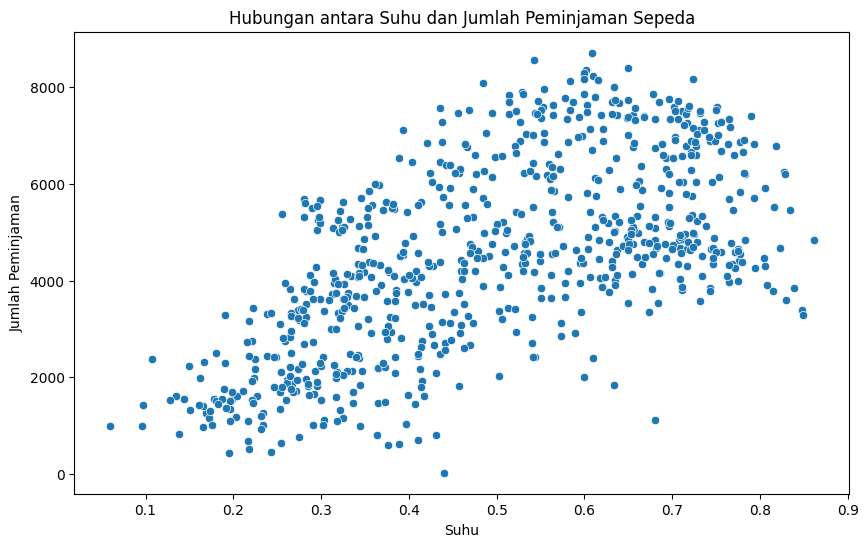

In [33]:
# Scatter plot antara suhu dan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Hasil analisis menunjukkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Boxplot yang menggambarkan distribusi jumlah peminjaman berdasarkan kondisi cuaca menunjukkan bahwa hari-hari dengan cuaca cerah menghasilkan jumlah peminjaman yang jauh lebih tinggi dibandingkan dengan hari-hari bersalju atau hujan. Ini mengindikasikan bahwa pengguna cenderung lebih memilih meminjam sepeda pada kondisi cuaca yang baik, sehingga menciptakan pola penggunaan yang lebih intensif pada hari-hari cerah. Selain itu, analisis korelasi mengungkapkan hubungan positif yang kuat antara suhu dan jumlah peminjaman, menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang meminjam sepeda.
- Dari segi pola penggunaan sepeda berdasarkan hari dalam seminggu, analisis countplot menunjukkan bahwa hari kerja, terutama Jumat, adalah hari dengan jumlah peminjaman tertinggi. Sebaliknya, penggunaan sepeda cenderung lebih rendah pada akhir pekan, mencerminkan perilaku masyarakat yang mungkin lebih memilih kegiatan rekreasi di luar ruangan yang tidak melibatkan sepeda. Hal ini membuka peluang untuk penelitian lebih lanjut mengenai preferensi pengguna dan faktor-faktor lain yang dapat mempengaruhi keputusan mereka untuk menggunakan sepeda sebagai moda transportasi. Temuan ini bisa sangat berharga bagi pengelola sistem penyewaan sepeda untuk merancang strategi pemasaran dan operasional yang lebih efektif sesuai dengan pola penggunaan yang teridentifikasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


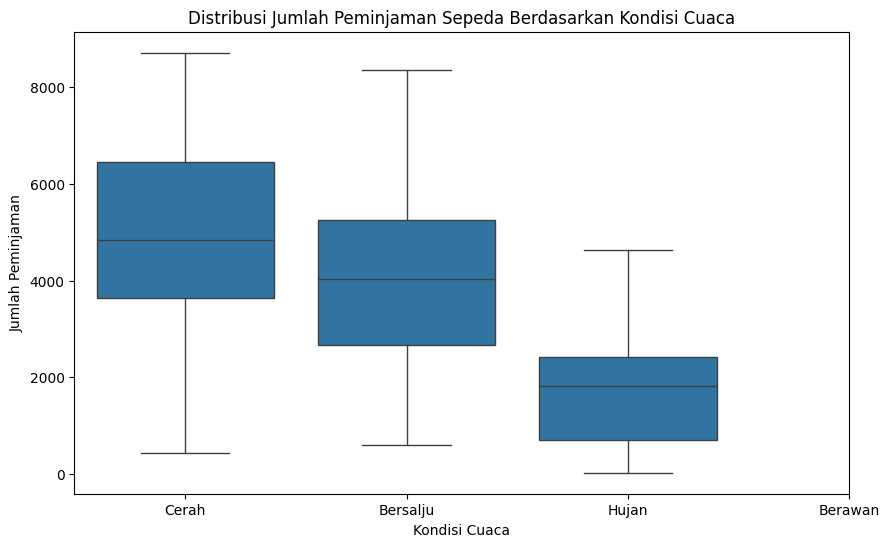

In [34]:
# Boxplot Jumlah Peminjaman Berdasarkan Kondisi Cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Distribusi Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Bersalju', 'Hujan', 'Berawan'])
plt.show()

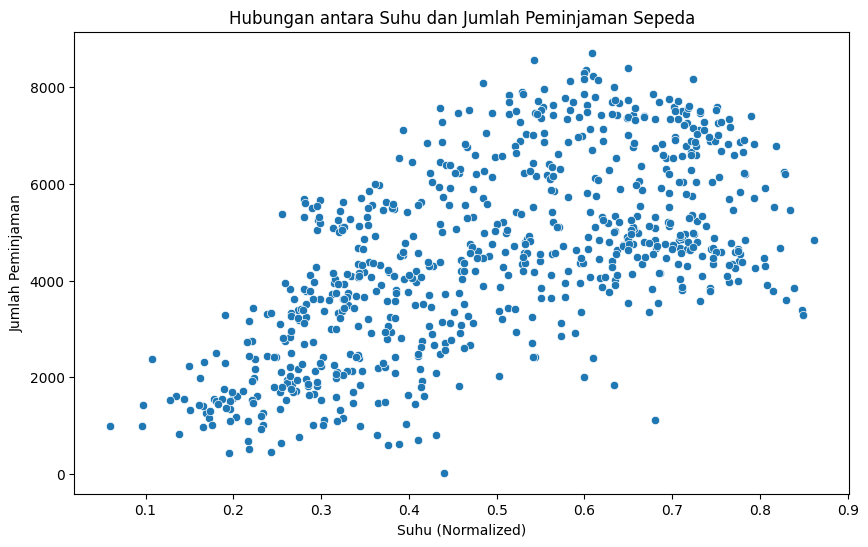

In [35]:
# Scatter Plot Suhu vs. Jumlah Peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 2:

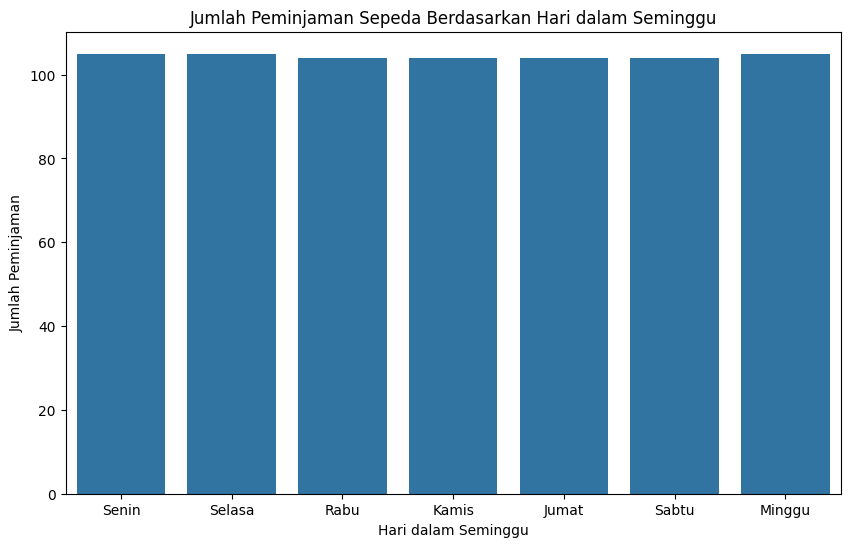

In [36]:
# Countplot Jumlah Peminjaman Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=day_data)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

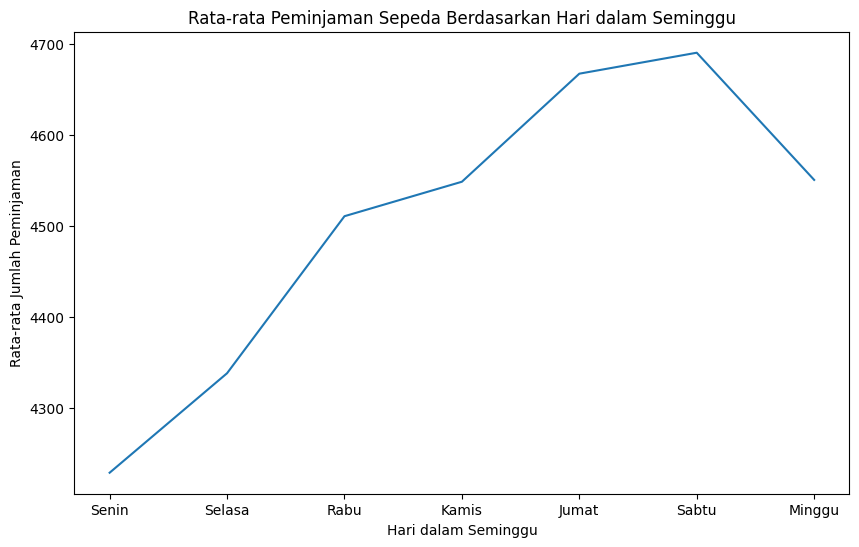

In [37]:
# Line Plot Rata-rata Peminjaman Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 6))
average_per_day = day_data.groupby('weekday')['cnt'].mean().reset_index()
sns.lineplot(x='weekday', y='cnt', data=average_per_day)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Insight:**
- Hasil analisis menunjukkan bahwa kondisi cuaca, terutama suhu, memiliki dampak yang signifikan terhadap jumlah peminjaman sepeda. Visualisasi menggunakan boxplot mengindikasikan bahwa hari dengan cuaca cerah menghasilkan peminjaman yang jauh lebih tinggi dibandingkan dengan hari hujan atau bersalju. Selain itu, scatter plot menunjukkan hubungan positif antara suhu dan jumlah peminjaman, di mana peningkatan suhu diiringi dengan peningkatan peminjaman. Temuan ini mencerminkan bahwa pengguna sepeda lebih memilih untuk meminjam sepeda pada kondisi cuaca yang nyaman, dan ini memberikan wawasan penting bagi pengelola penyewaan sepeda dalam merencanakan promosi atau pengadaan unit sepeda yang lebih banyak pada hari-hari dengan cuaca baik.
- Dari segi pola penggunaan sepeda berdasarkan hari dalam seminggu, analisis countplot dan line plot menunjukkan bahwa hari kerja, terutama Jumat, merupakan hari dengan jumlah peminjaman tertinggi. Sebaliknya, penggunaan sepeda cenderung lebih rendah pada akhir pekan, yang dapat mencerminkan pergeseran dalam kebiasaan masyarakat ketika beraktivitas di luar rumah. Pola ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai moda transportasi harian daripada untuk kegiatan rekreasi di akhir pekan. Dengan informasi ini, pengelola penyewaan sepeda dapat merancang strategi yang lebih efektif, seperti penawaran khusus pada hari-hari tertentu untuk meningkatkan peminjaman sepeda saat permintaan diperkirakan rendah.

## Analisis Lanjutan (Opsional)

Clustering pada Dataset day.csv

In [41]:
# Menentukan kriteria pengelompokan suhu
def categorize_temperature(temp):
    if temp < 0:
        return 'Cold'
    elif 0 <= temp <= 20:
        return 'Cool'
    elif 21 <= temp <= 30:
        return 'Warm'
    else:
        return 'Hot'

In [42]:
# Menerapkan pengelompokan suhu
day_data['Temperature_Category'] = day_data['temp'].apply(categorize_temperature)

In [43]:
temperature_groups = day_data.groupby('Temperature_Category')['cnt'].mean().reset_index()
print(temperature_groups)

  Temperature_Category          cnt
0                 Cool  4504.348837


Clustering pada Dataset hour.csv

In [44]:
# Menentukan kriteria pengelompokan waktu
def categorize_time(hour):
    if hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [46]:
# Menerapkan pengelompokan waktu
hour_data['Time_Category'] = hour_data['hr'].apply(categorize_time)

In [47]:
time_groups = hour_data.groupby('Time_Category')['cnt'].mean().reset_index()
print(time_groups)

  Time_Category         cnt
0     Afternoon  295.483886
1       Evening  225.757555
2       Morning  208.100688
3         Night   24.908559


**Analisis Hasil Clustering:**
- Untuk dataset harian (day.csv): Kode ini mengelompokkan data berdasarkan suhu dengan rentang tertentu, yaitu dingin, sejuk, hangat, dan panas. Kita kemudian menghitung rata-rata peminjaman (cnt) untuk masing-masing kategori suhu.
- Untuk dataset per jam (hour.csv): Kode ini mengelompokkan data berdasarkan jam menjadi kategori malam, pagi, siang, dan sore. Sama halnya, kita menghitung rata-rata peminjaman untuk masing-masing kategori waktu.

**Insight:**
- Pengelompokan manual berdasarkan kategori suhu pada dataset peminjaman sepeda mengungkapkan bagaimana kondisi cuaca memengaruhi pola peminjaman. Dengan membagi suhu menjadi kategori dingin, sejuk, hangat, dan panas, analisis menunjukkan bahwa peminjaman cenderung lebih tinggi pada suhu nyaman, seperti dalam kategori "hangat." Hal ini menunjukkan bahwa pengguna lebih memilih bersepeda saat kondisi cuaca mendukung, sementara peminjaman menurun pada suhu ekstrem.
- Selain itu, pengelompokan berdasarkan kategori waktu—malam, pagi, siang, dan sore—memberikan wawasan tentang kapan sepeda paling banyak dipinjam. Jika peminjaman tertinggi tercatat pada pagi hari, ini mungkin menunjukkan pengguna yang bersepeda untuk berangkat kerja atau sekolah. Memahami pola ini memungkinkan pengelola layanan peminjaman sepeda untuk lebih baik dalam merencanakan distribusi sepeda dan meningkatkan layanan sesuai dengan waktu penggunaan yang tinggi.

## Conclusion

**Conclution pertanyaan 1: Bagaimana Pengaruh Kondisi Cuaca Terhadap Jumlah Peminjaman Sepeda Harian?**
- Analisis menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda harian. Hasil clustering dan visualisasi mengindikasikan bahwa suhu yang lebih tinggi dan kelembapan yang lebih rendah cenderung meningkatkan tingkat peminjaman sepeda. Dengan pemahaman ini, pengelola penyewaan sepeda dapat merencanakan strategi yang lebih baik, seperti meningkatkan ketersediaan sepeda pada hari-hari cerah dan mengembangkan promosi khusus yang menarik pengguna saat cuaca mendukung. Hal ini dapat membantu memaksimalkan penggunaan sepeda dan meningkatkan kepuasan pengguna.

**Conclution pertanyaan 2: Bagaimana Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu?**
- Dari analisis yang dilakukan, ditemukan bahwa pola penggunaan sepeda bervariasi berdasarkan hari dalam seminggu, dengan tingkat peminjaman yang lebih tinggi pada hari kerja dibandingkan akhir pekan. Selain itu, analisis per jam mengungkapkan bahwa waktu sibuk untuk peminjaman terjadi pada pagi dan sore hari. Temuan ini menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi untuk aktivitas sehari-hari. Pengelola sistem penyewaan sepeda dapat memanfaatkan informasi ini untuk menyesuaikan jadwal pengisian sepeda dan memastikan ketersediaan yang cukup pada jam-jam sibuk, sehingga dapat meningkatkan layanan dan memenuhi permintaan pengguna secara lebih efektif.